# LAB4 - TensorFlow Lite
ver: 3

Przedmiot: _Sztuczna Inteligencja w Systemach Informatycznych_

Autor: Tomasz Szydło

kontakt: tszydlo@agh.edu.pl


## Wprowadzenie

Celem zajęć jest analiza działania konwersji sieci neuronowych do postaci możliwej do uruchomienia na urządzeniach o ograniczonych zasobach. W czasie zajęć będzie wykorzystywany zbiór Fashion MNIST, który zawiera 60000 obrazków w 10 kategoriach:

https://github.com/zalandoresearch/fashion-mnist


https://www.tensorflow.org/datasets/catalog/fashion_mnist


### Środowisko pracy - Google Codelab

https://codelabs.developers.google.com/?cat=Machine+Learning



In [ ]:
try:
  %tensorflow_version 2.x
except:
  pass

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, AveragePooling2D, MaxPooling2D

from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import pathlib

import time

print(tf.__version__)

2.8.0


Przygotuj zbiór testowy. Zbiór fashion_mnist nie posiada słownych opisów klas.

In [ ]:
nb_classes = 10
class_names = ['T-shirt_top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


Wypisz ilość elementów w zbiorze uczącym i testowym.





In [ ]:
print(X_test)
print(X_train)

print(len(list(X_test)))
print(len(list(X_train)))

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ...

**TODO** Zmień poniższy kod tak by wyświetlić 10 przykładowych obrazków - po jednym z każdej klasy.

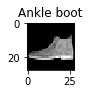

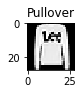

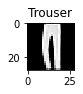

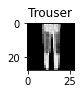

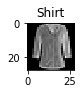

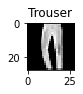

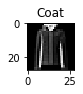

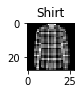

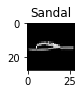

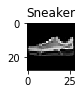

In [ ]:
for i in range(10):
    plt.figure(figsize=(10,8))
    plt.subplot(1, 10,i+1)
    plt.imshow(X_test[i], cmap='gray', interpolation='none')
    plt.title("{}".format(class_names[y_test[i]]))

Sieć neuronowa przyjmuje na wejściu obrazek z jednym kanałem - poziomem jasności, więc konieczne jest przekształcenie danych wejściowych, aby każdy obraz 28 x 28 stał się macierzą 28 x 28 x 1. 

Skalujemy również dane wejściowe w zakresie [0–1] zamiast [0–255]

In [ ]:
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

print(nb_classes)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)
10


Zmodyfikuj macierze wyjść korzystając z techniki One Hot Encoding, tj.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
```
itp.

In [ ]:
Y_train = np_utils.to_categorical(y_train, num_classes=10)
Y_test = np_utils.to_categorical(y_test, num_classes=10)

Wielowarstwowa sieć konwolucyjna do klasyfikacji ubrań.

In [ ]:
model = Sequential([
  Conv2D(16, 3, activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  Flatten(),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 64)                247872    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

W celu skrócenia czasu uczenia sieci wskazane jest użycie GPU.

In [ ]:
model.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 22s 6ms/step - loss: 0.4357 - accuracy: 0.8433 - val_loss: 0.3378 - val_accuracy: 0.8770
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2896 - accuracy: 0.8958 - val_loss: 0.2788 - val_accuracy: 0.8982
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2398 - accuracy: 0.9128 - val_loss: 0.2618 - val_accuracy: 0.9051
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2064 - accuracy: 0.9236 - val_loss: 0.2498 - val_accuracy: 0.9106
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1791 - accuracy: 0.9338 - val_loss: 0.2464 - val_accuracy: 0.9112
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1564 - accuracy: 0.9430 - val_loss: 0.2410 - val_accuracy: 0.9148
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1367 - accuracy: 0.9492 - val_loss: 0.2512 - val_ac

# Zapisywanie NN

Szczegółowe informacje dotyczące zapisywania modeli TensorFlow dostępne pod linkiem:

https://www.tensorflow.org/tutorials/keras/save_and_load

In [ ]:
export_dir = 'saved_model'
model.save(export_dir)

INFO:tensorflow:Assets written to: saved_model/assets


Po zapisaniu modelu należy kliknąć "Refresh" po lewej stronie w zakładce "Files". W katalogu "saved_model" znajduje się zapisany model.

# Export do TFLite

Narzędzie `TFLiteConverter` zostanie wykorzystane do konwersji modelu NN do formatu akceptowanego przez TFLite tzn. `flat protocol buffers`.

https://www.tensorflow.org/lite/guide/get_started#2_convert_the_model_format

Wygenerowany model `"model-base.tflite"` operuje na wagach typu `float32`.

In [ ]:
  converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
  tflite_model = converter.convert()

  with open("model-base.tflite", "wb") as f:
    f.write(tflite_model)  


Po zapisaniu modelu należy kliknąć "Refresh" po lewej stronie w zakładce "Files". 

Kolejnym krokiem jest kwantyzacja wag modelu z 32 bitowych liczb rzeczywistych do liczb 8 bitowych. Proces kwantyzacji jest uruchamiany na gotowym, wyuczonym modelu. Należy wybrać profil optymaliacji `tf.lite.Optimize.DEFAULT`.



In [ ]:
  import logging
  logging.getLogger('tensorflow').setLevel(logging.DEBUG)

  converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
  
  #TODO ustaw odpowiedni rodzaj optymalizacji sieci neuronowej
  optimization = tf.lite.Optimize.DEFAULT
  converter.optimizations = [optimization]
  tflite_model = converter.convert()

  with open("model-quant.tflite", "wb") as f:
    f.write(tflite_model)  


Po zapisaniu modelu należy kliknąć "Refresh" po lewej stronie w zakładce "Files".

In [ ]:
# funkcja testujaca model z wykorzystaniem interpretera TFLite
# TODO zmodyfikuj funkcje tak by zwracala (accuracy, latency)
import time
def test_model_accuracy(tflite_model):
  # Load TFLite model and allocate tensors.
  interpreter = tf.lite.Interpreter(model_path=tflite_model)
  interpreter.allocate_tensors()

  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]
  
  correct_prediction = 0
  time_start = time.time()
  for img, label in zip(X_test, y_test):
    
    interpreter.set_tensor(input_index, [img])
    interpreter.invoke()
    prediction = interpreter.get_tensor(output_index)
    label_is = np.argmax(prediction, axis=-1)[0]
    label_should_be = label
    # print("Label is {} should be {}.".format(label_is, label_should_be))
    if label_is == label_should_be: 
      correct_prediction += 1

    end_time = time.time()  
  accuracy = correct_prediction / X_test.shape[0]  
  
  latency = end_time - time_start 
  return (accuracy, latency) #(accuracy, latency)



In [ ]:
#TODO tylko na potrzeby testowania - do usuniecia
print(test_model_accuracy("model-base.tflite"))

#TODO tylko na potrzeby testowania - do usuniecia
print(test_model_accuracy("model-quant.tflite"))

model_base = test_model_accuracy("model-base.tflite")
model_quant = test_model_accuracy("model-quant.tflite")

(0.912, 1.1180264949798584)
(0.9127, 19.206303119659424)


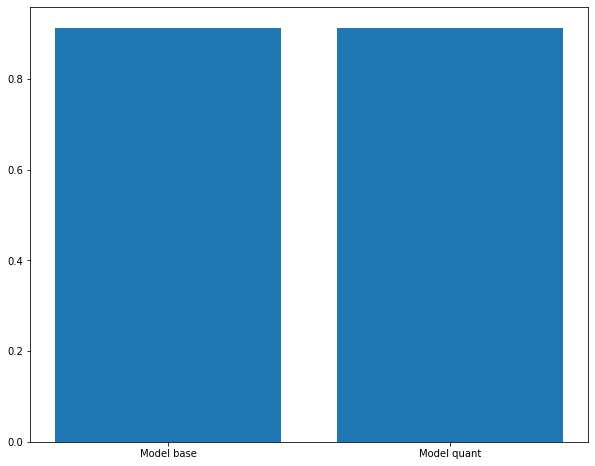

In [ ]:
# porównaj dokladnosc wynikowych modeli TFLite

# TODO wyniki przedstaw na wykresie słupkowym (jeden slupek dla model-base, a drugi dla model-quant)
data = {'Model base': model_base[0], 'Model quant': model_quant[0]}
names = list(data.keys())
values = list(data.values())
plt.figure(figsize=(10,8))
plt.bar(names, values)
plt.show()

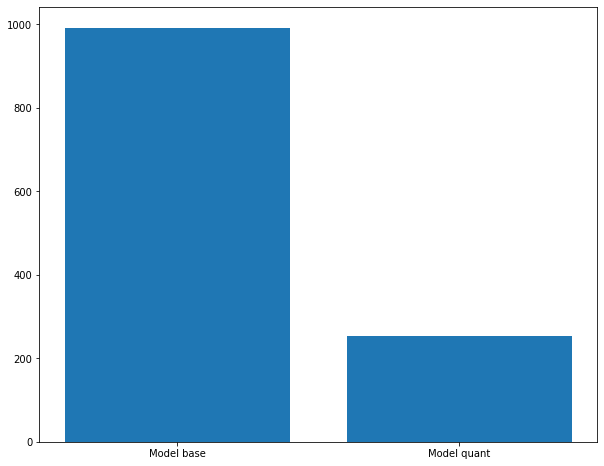

In [ ]:
# porównaj rozmiar wynikowych modeli TFLite
data = {'Model base': 992.3, 'Model quant': 253.69}
names = list(data.keys())
values = list(data.values())

plt.figure(figsize=(10,8))
plt.bar(names, values)
plt.show()
# TODO wyniki przedstaw na wykresie słupkowym (jeden slupek dla model-base, a drugi dla model-quant)

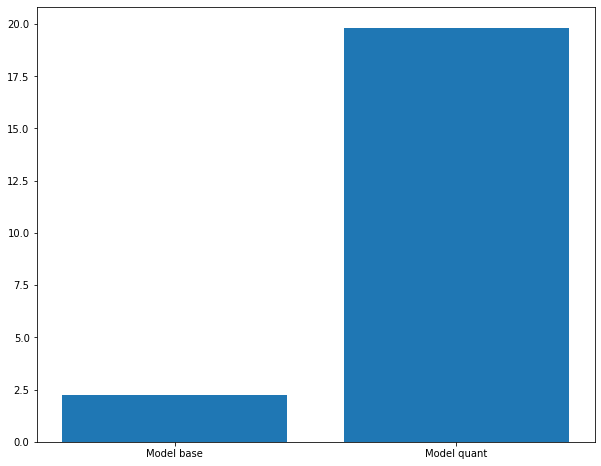

In [ ]:
# porównaj czas dzialania wynikowych modeli TFLite
data = {'Model base': model_base[1], 'Model quant': model_quant[1]}
names = list(data.keys())
values = list(data.values())
plt.figure(figsize=(10,8))
plt.bar(names, values)
plt.show()
# TODO wyniki przedstaw na wykresie słupkowym (jeden slupek dla model-base, a drugi dla model-quant)

 # Wnioski

**TODO** przedstaw wnioski z przeprowadzonych eksperymentów
**TODO** dlaczego czasy działania modeli są różne? \
Ze względu na architekture, czasy działania modeli są rózne. \
- Model base: accuracy 91%, Model quant: accuracy 91% \
Accuracy jest na tym samym poziomie dla obydwóch modeli \
- Rozmiar modelu base jest prawie 4x większy niż modelu quant. \
- Model quant wykonywał się znacznie dłużej: 19,2 sek natomiat \
w przypadku modelu base czas wykonania wynosi jedynie 1,1 sek.  
